# Green Nest Material Meta-Analysis

The adaptive value of green nest material across birds: A systematic review and meta-analysis

Shreya Dimri  
April 30, 2025

In [ ]:
# Setting up workspace

# For plotting trees, and although not strictly necessary, we may need the `ggtree` R package, which you should be able to install by running:
# if (!require("BiocManager", quietly = TRUE))
# install.packages("BiocManager")
# BiocManager::install("ggtree")

#devtools::install_github("daniel1noble/orchaRd", ref = "main", force = TRUE)
pacman::p_load(here, tidyverse, metafor,ggpubr,orchaRd,ggpubfigs) #Packages needed



A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages

Warning in p_install(package, character.only = TRUE, ...):

Warning in library(package, lib.loc = lib.loc, character.only = TRUE,
logical.return = TRUE, : there is no package called 'ggpubfigs'

Warning in pacman::p_load(here, tidyverse, metafor, ggpubr, orchaRd, ggpubfigs): Failed to install/load:
ggpubfigs

Rows: 279 Columns: 71
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (35): paper_ID, fulltext_screening, variable_note, authors, population_l...
dbl (35): year_publication, Observation_ID, experiment_ID, group_ID, repeate...
lgl  (1): fulltext_notes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

### Creating Phylogeny for the plot


Progress [----------------------------------] 0/99 (  0%) ?s
Progress [================================] 99/99 (100%)  0s
                                                            

Warning in collapse_singles(tr, show_progress): Dropping singleton nodes with
labels: mrcaott246ott2907, mrcaott246ott3600042, mrcaott246ott47588,
mrcaott246ott7113, Passeriformes, mrcaott246ott3212, mrcaott246ott428578,
mrcaott246ott44866, mrcaott246ott5929, mrcaott246ott32658, mrcaott246ott4820,
mrcaott246ott310390, mrcaott246ott176461, mrcaott246ott22325,
mrcaott246ott10351, mrcaott246ott193904, mrcaott246ott5935, mrcaott246ott1566,
mrcaott1566ott3598440, mrcaott1566ott496009, mrcaott1566ott2175,
mrcaott2175ott600902, mrcaott2175ott259082, mrcaott2175ott59905,
mrcaott2175ott2224, mrcaott2224ott366470, mrcaott3364ott310375,
mrcaott3364ott3370, mrcaott4083ott35042, mrcaott4083ott370807,
mrcaott4083ott469177, mrcaott4083ott18592, mrcaott4083ott4088,
mrcaott4088ott9416, mrcaott9416ott840030, mrcaott9416ott96148,
mrcaott9416ott7068473, Passer, mrcaott9416ott7661508, mrcaott1488ott72472,
mrcaott1488ott63797, mrcaott1488ott284404, mrcaott1488ott107463,
mrcaott1488ott17016, mrcaott1488ott10

[1] TRUE

[1] "Buteo_buteo"         "Cyanistes_caeruleus" "Parus_major"        
[4] "Passer_cinnamomeus"  "Sturnus_unicolor"    "Sturnus_vulgaris"   
[7] "Tachycineta_bicolor"

[1] "Buteo buteo"         "Cyanistes caeruleus" "Parus major"        
[4] "Passer cinnamomeus"  "Sturnus unicolor"    "Sturnus vulgaris"   
[7] "Tachycineta bicolor"

[1] TRUE

                    Sturnus unicolor Sturnus vulgaris Passer cinnamomeus
Sturnus unicolor           1.0000000        0.8333333          0.6666667
Sturnus vulgaris           0.8333333        1.0000000          0.6666667
Passer cinnamomeus         0.6666667        0.6666667          1.0000000
Tachycineta bicolor        0.1666667        0.1666667          0.1666667
Parus major                0.1666667        0.1666667          0.1666667
Cyanistes caeruleus        0.1666667        0.1666667          0.1666667
Buteo buteo                0.0000000        0.0000000          0.0000000
                    Tachycineta bicolor Parus major Cyanistes caeruleus
Sturnus unicolor              0.1666667   0.1666667           0.1666667
Sturnus vulgaris              0.1666667   0.1666667           0.1666667
Passer cinnamomeus            0.1666667   0.1666667           0.1666667
Tachycineta bicolor           1.0000000   0.6666667           0.6666667
Parus major                   0.6666667   1.0000000     

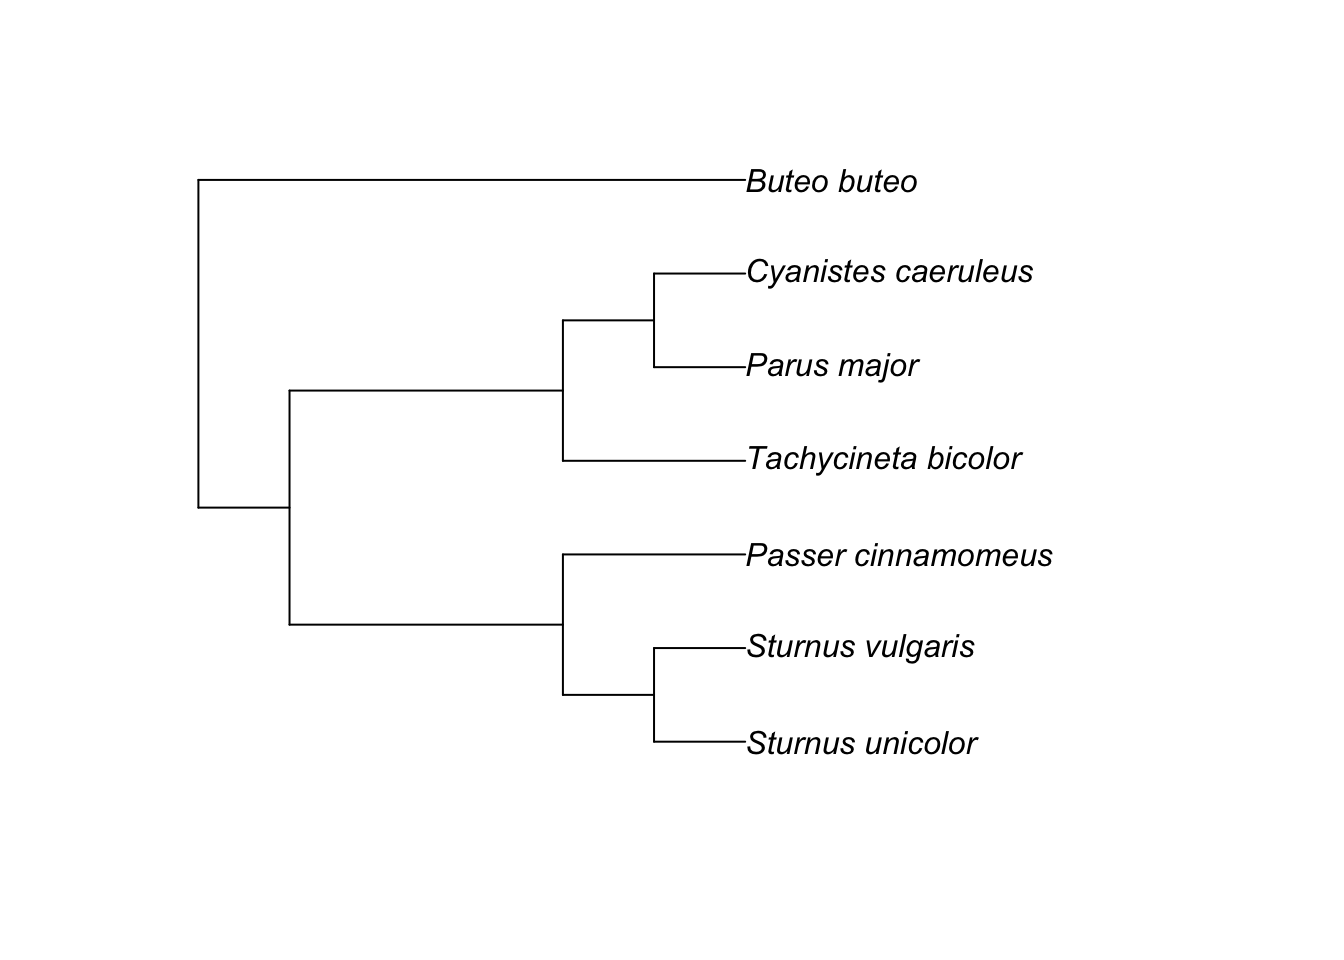

In [ ]:
# install.packages("pacman")
# load packages
pacman::p_load(rotl,
               ape,
               ggtree)
# Doesn't matter if I take dataset_lnRR or dataset_SMDH
bird_species <- unique(dataset_analysis$bird_species)

# extracting taxonomic information
taxa <- rotl::tnrs_match_names(names = bird_species)
taxa


### Visualizing random effects structure

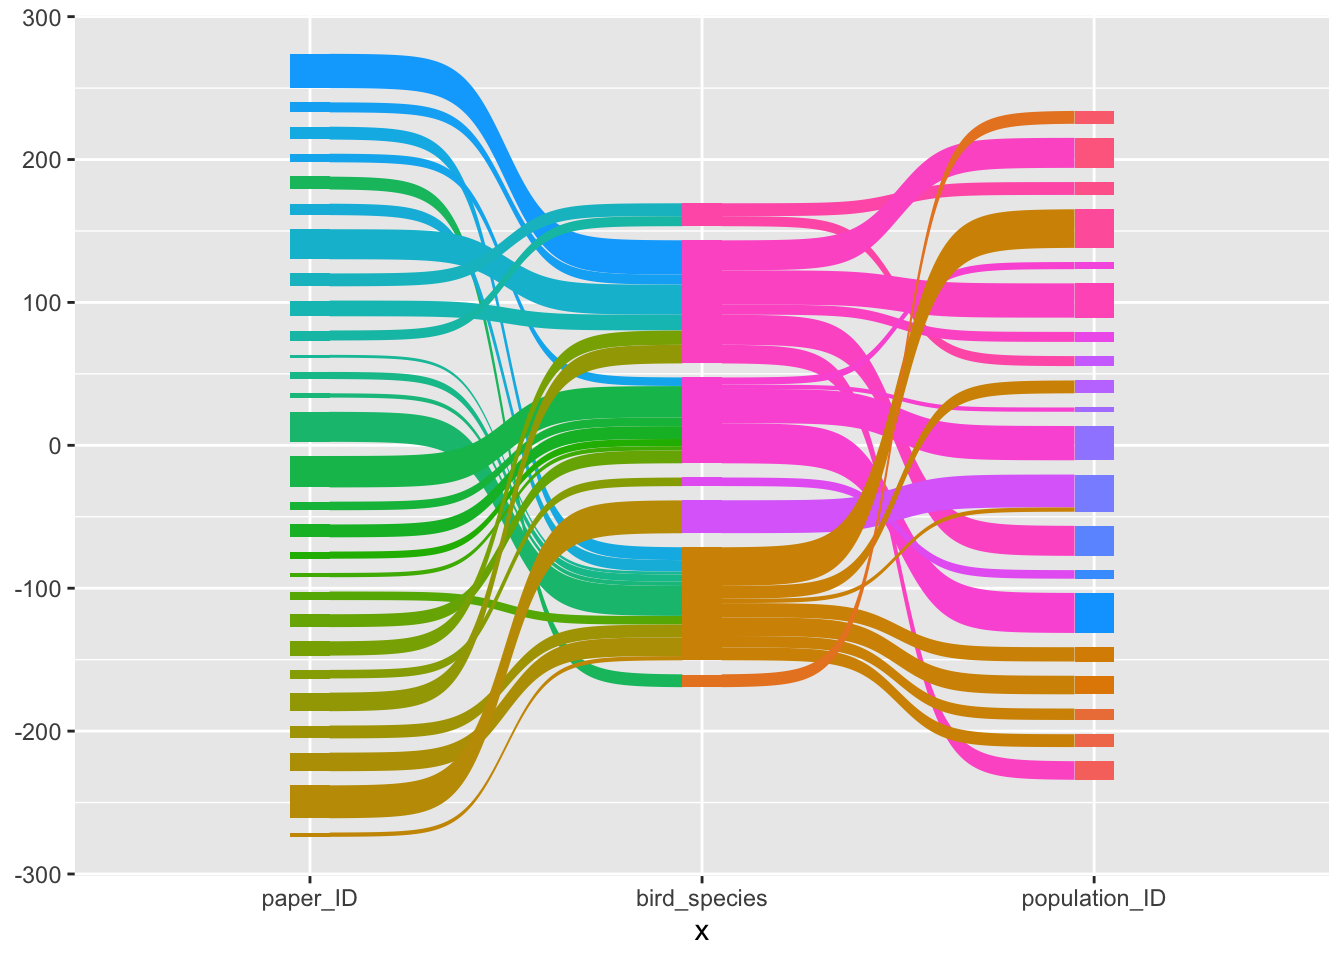

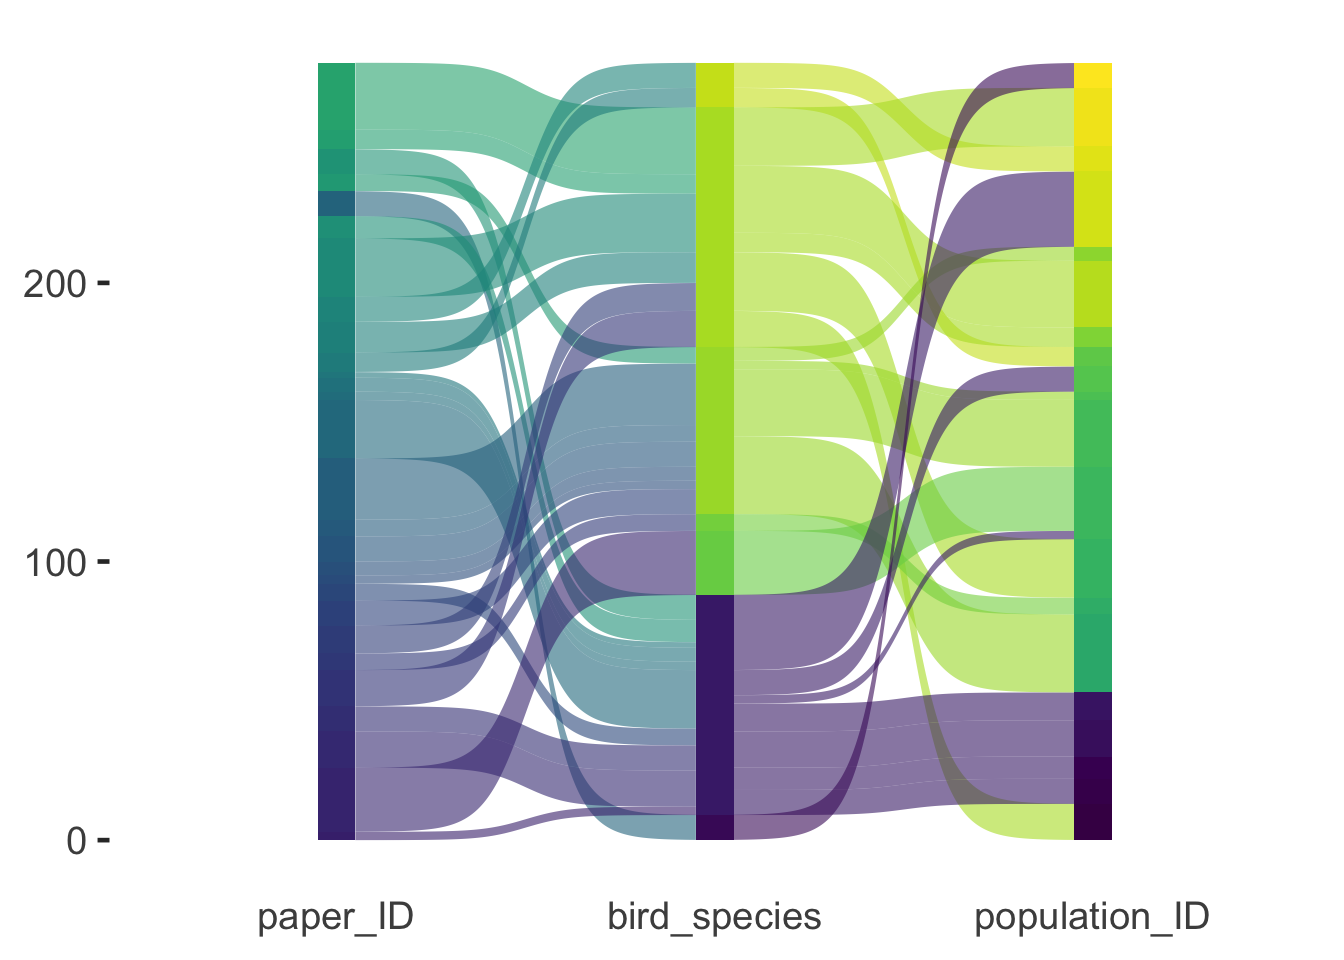

In [ ]:
# install.packages("devtools")
#devtools::install_github("davidsjoberg/ggsankey")
library(ggsankey)

sankey_data <- dataset_analysis %>%
  select(Observation_ID, repeated_trait_ID_coded, paper_ID, experiment_ID_coded, group_ID_coded)%>%
  mutate(across(c(Observation_ID, repeated_trait_ID_coded, paper_ID, experiment_ID_coded, group_ID_coded), as.character)) %>%
  make_long(Observation_ID, repeated_trait_ID_coded, paper_ID, experiment_ID_coded, group_ID_coded)

sankey_data <- dataset_analysis %>%
  select(paper_ID, bird_species, population_ID)%>%
  mutate(across(c(paper_ID, bird_species, population_ID), as.character)) %>%
  make_long(paper_ID, bird_species, population_ID)


ggplot(sankey_data, aes(x = x, 
               next_x = next_x, 
               node = node, 
               next_node = next_node,
               fill = factor(node))) +
  geom_sankey() +
  scale_fill_discrete(drop=FALSE) +
  theme(legend.position = "none")


# Preparing datasets

In [ ]:
## For lnRR
# selecting dataset which are not flagged
dataset_lnRR<-dataset_analysis%>%
   filter(lnRR_sign != "NA" | lnRR_variance != "NA")%>%
  filter(proxy_decision == "include")

# selecting dataset which are flagged
lnRR_con_flagged<-dataset_analysis%>%
   filter(lnRR_sign != "NA" | lnRR_variance != "NA")%>%
  filter(proxy_decision != "SMDH only" | proxy_decision != "contingency table" )

# selecting dataset without those using 0 as ES because authors reported no effect
lnRR_sin_missingES <- dataset_lnRR %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

lnRR_flagged_no_missingES<- lnRR_con_flagged %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

## For SMDH
# selecting dataset which are not flagged
dataset_SMDH<-dataset_analysis%>%
   filter(proxy_decision == "include"| proxy_decision == "SMDH only"|proxy_decision =="contingency table") %>% filter(SMDH_sign != "NA")


# selecting dataset which are flagged
SMDH_con_flagged<-dataset_analysis%>%
   filter(SMDH_sign != "NA")

# selecting dataset without those using 0 as ES because authors reported no effect

SMDH_sin_missingES <- dataset_SMDH %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

SMDH_flagged_no_missingES<- SMDH_con_flagged %>% 
   filter(!proxy_comment %in% c("use 0 as ES"))

# selecting dataset which are not flagged but without the SMDH calculated from inferential statistics 

SMDH_no_inferential<-dataset_analysis%>%
  filter(proxy_decision == "include")%>% filter(SMDH_sign != "NA")


# Overall effect : Intercept-only meta-analytic model

*“Does adding green material to the nest have an adaptive function across the bird species that perform this behaviour?”*

## using lnRR

In [ ]:
VCV_lnRR<- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

intercept_lnRR<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = dataset_lnRR)
# saving the model
saveRDS(intercept_lnRR, file = here::here("model/intercept_lnRR.rds"))


Exploring heterogeneity in intercept only model

This is the function from Yefeng’s Github for interpretting heterogeneity. I have to download the data used for this function to be able to use it. For now I am using the values from the table directly so I should just delete it later before finishing the code.

In [ ]:
# ## Function is from the Pluralistic approach to heterogeneity from Yefeng's Pre-print repository from GitHub
# 
# #-----------------------heterogeneity interpretation-----------------------#
# het_interpret <- function(observed_value, het_type, es_type, data) {
#   
#   if (!het_type %in% c("I2", "CVH", "M", "sigma2", "V_bar")) {
#     stop("Invalid heterogeneity type. Choose from 'I2', 'CVH', 'M', 'sigma2', or 'V_bar'.")
#   }
#   
#   if (!es_type %in% unique(data$es.type)) {
#     stop("Invalid effect size type. Check the levels of 'es.type'.")
#   }
#   
#   filtered_data <- data %>% filter(es.type == es_type)
#   
#   if (nrow(filtered_data) == 0) {
#     stop("No data available for the selected effect size type.")
#   }
#   
#   het_values <- filtered_data[[het_type]]
#   
#   percentiles <- quantile(het_values, probs = seq(0, 1, by = 0.05), na.rm = TRUE)
#   
#   lower_bound <- max(percentiles[percentiles <= observed_value], na.rm = TRUE)
#   upper_bound <- min(percentiles[percentiles >= observed_value], na.rm = TRUE)
#   lower_percentile <- names(percentiles)[percentiles == lower_bound]
#   upper_percentile <- names(percentiles)[percentiles == upper_bound]
#   
#   percentile_range <- paste0(lower_percentile, "-", upper_percentile, "th percentile")
#   
#   # return the results
#   return(tibble::tibble(
#     observed_value = observed_value,
#     het_type = het_type,
#     es_type = es_type,
#     percentile_range = percentile_range
#   ))
# }
# x<-het_interpret(observed_value= I2_main_model_vector[1], 
#                  het_type = "I2", 
#                  es_type = "lnRR_sign", 
#                  data= intercept_lnRR)


## lnRR-heterogeneity

Let us look at the heterogeneity in lnRR intercept-only model

In [ ]:
# Then also:
# # Typical sampling variance (which captures the statistical noise of the data, 
# # but is rarely reported in the current meta-analytic practice):
sigma2_v(intercept_lnRR)


[1] 0.0003310316

[1] 0.022

## using SMDH

We are only running these analysis for the fitness proxy labelled “included”. Some proxies have been flagged and we will run them in a sensitivity analysis only

their sampling variances will be fitted as variance–covariance matrices assuming a 0.5 correlation (ρs) between sampling variances from the same paper_ID (Noble et al. 2017).

The MLMA using SMDH as the effect size measure incorporate the imputed sampling variance

In [ ]:
VCV_SMDH <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

intercept_SMDH<- rma.mv(yi = SMDH_sign, # specify SMDH as the effect size measure;
                    V = VCV_SMDH, # specify SMDH's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = dataset_SMDH)

# saving the model
# saveRDS(intercept_SMDH, file = here::here("model/intercept_SMDH.rds"))


## SMDH-heterogeneity

Now looking at the intercept only model

In [ ]:
summary(intercept_SMDH)



Multivariate Meta-Analysis Model (k = 258; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-328.9026   657.8052   669.8052   691.0997   670.1412   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0010     26     no        paper_ID 
sigma^2.2  0.2543  0.5043    258     no  Observation_ID 
sigma^2.3  0.0000  0.0021     47     no  group_ID_coded 
sigma^2.4  0.0000  0.0042     19     no   population_ID 
sigma^2.5  0.0000  0.0002      7     no    bird_species 

Test for Heterogeneity:
Q(df = 257) = 1124.7869, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1720  0.0662  2.5979  257  0.0099  0.0416  0.3024  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1720 0.0662 0.0416 0.3024 -0.8296 1.1736 

[1] 0.1321033

[1] 0.254

## Bivariate Meta-analytical model

For the overall effect size (i.e., the meta-analytical mean), we will run the bivariate multilevel meta-analytic model suggested by Yang et al. (2024), which models both lnRR and SMD(H) simultaneously (i.e., including them both as response variables and estimating their correlation; random).

In [ ]:
dataset_bivariate <- data.frame(paper_ID = c(dataset_lnRR$paper_ID, dataset_SMDH$paper_ID),
                      Observation_ID = c(dataset_lnRR$Observation_ID, dataset_SMDH$Observation_ID),
                      group_ID_coded = c(dataset_lnRR$group_ID_coded, dataset_SMDH$group_ID_coded),
                      population_ID = c(dataset_lnRR$population_ID, dataset_SMDH$population_ID),
                      bird_species = c(dataset_lnRR$bird_species, dataset_SMDH$bird_species),
                      ES = c(dataset_lnRR$lnRR_sign, dataset_SMDH$SMDH_sign),
                      V_ES = c(dataset_lnRR$lnRR_variance, dataset_SMDH$SMDH_variance),
                      ES_measure = c(rep("lnRR", nrow(dataset_lnRR)), rep("SMDH", nrow(dataset_SMDH)))
                      )

VCV_bivariate <- vcalc(vi = V_ES, # sampling variances of lnRR and SMD that are correlated within the same study;
             cluster = paper_ID, # study identity;
             type = ES_measure, # different types of effect size measures underlying the observed effect sizes;
             data = dataset_bivariate, # the long format data frame;
             rho = 0.2, # assuming that the effect sizes within the same study are correlated with rho = 0.5.
             nearpd = TRUE # specify whether impose the non positive definite VCV matrix (not invertible) to the nearest positive semi-definite matrix 
             )

Bivariate_model <- rma.mv(yi = ES, # specify the effect size estimate (the variable ES in our case);
                V = VCV_bivariate, # specify the imputed variance-covariance matrix;
                mods = ~ ES_measure - 1, # specify the variable "ES_measure" indicating the types of effect size measures;
                random = list(~ ES_measure | paper_ID, 
                              ~ ES_measure | Observation_ID,
                              ~ 1 | group_ID_coded,
                              ~ 1 | population_ID,
                              ~ 1 | bird_species
                              ), # add correlated random effects corresponding to the lnRR and SMD parameters in the same study;
                struct = "UN", # impose an unstructured variance-covariance of the study-specific random effects;
                test = "t", # t distribution is specified to test the overall effect against the null hypothesis and construct confidence intervals;
                method = "REML", # restricted likelihood maximum is assigned as the estimator for variance components as suggested;
                data = dataset_bivariate, # the long format dataset
                sparse = T
               )

saveRDS(Bivariate_model, file = here::here("sensitivity_analysis/bivariate_model.rds"))

summary(Bivariate_model)



Multivariate Meta-Analysis Model (k = 501; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-485.9593   971.9186   993.9186  1040.2573   994.4607   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0000     47     no  group_ID_coded 
sigma^2.2  0.0000  0.0000     19     no   population_ID 
sigma^2.3  0.0000  0.0000      7     no    bird_species 

outer factor: paper_ID   (nlvls = 26)
inner factor: ES_measure (nlvls = 2)

            estim    sqrt  k.lvl  fixed  level 
tau^2.1    0.0013  0.0359     26     no   lnRR 
tau^2.2    0.1561  0.3951     26     no   SMDH 

      rho.lnRR  rho.SMDH    lnRR  SMDH 
lnRR         1                 -    26 
SMDH   -1.0000         1      no     - 

outer factor: Observation_ID (nlvls = 258)
inner factor: ES_measure     (nlvls = 2)

              estim    sqrt  k.lvl  fixed  level 
gamma^2.1    0.1264  0.3555    243     no   lnRR 
gamma^2.2    1.2527  1.1192    258     no   SMDH

Warning in geom_point(aes(x = coef(Bivariate_model)[1], y = coef(Bivariate_model)[2]), : All aesthetics have length 1, but the data has 258 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.

(`geom_point()`).

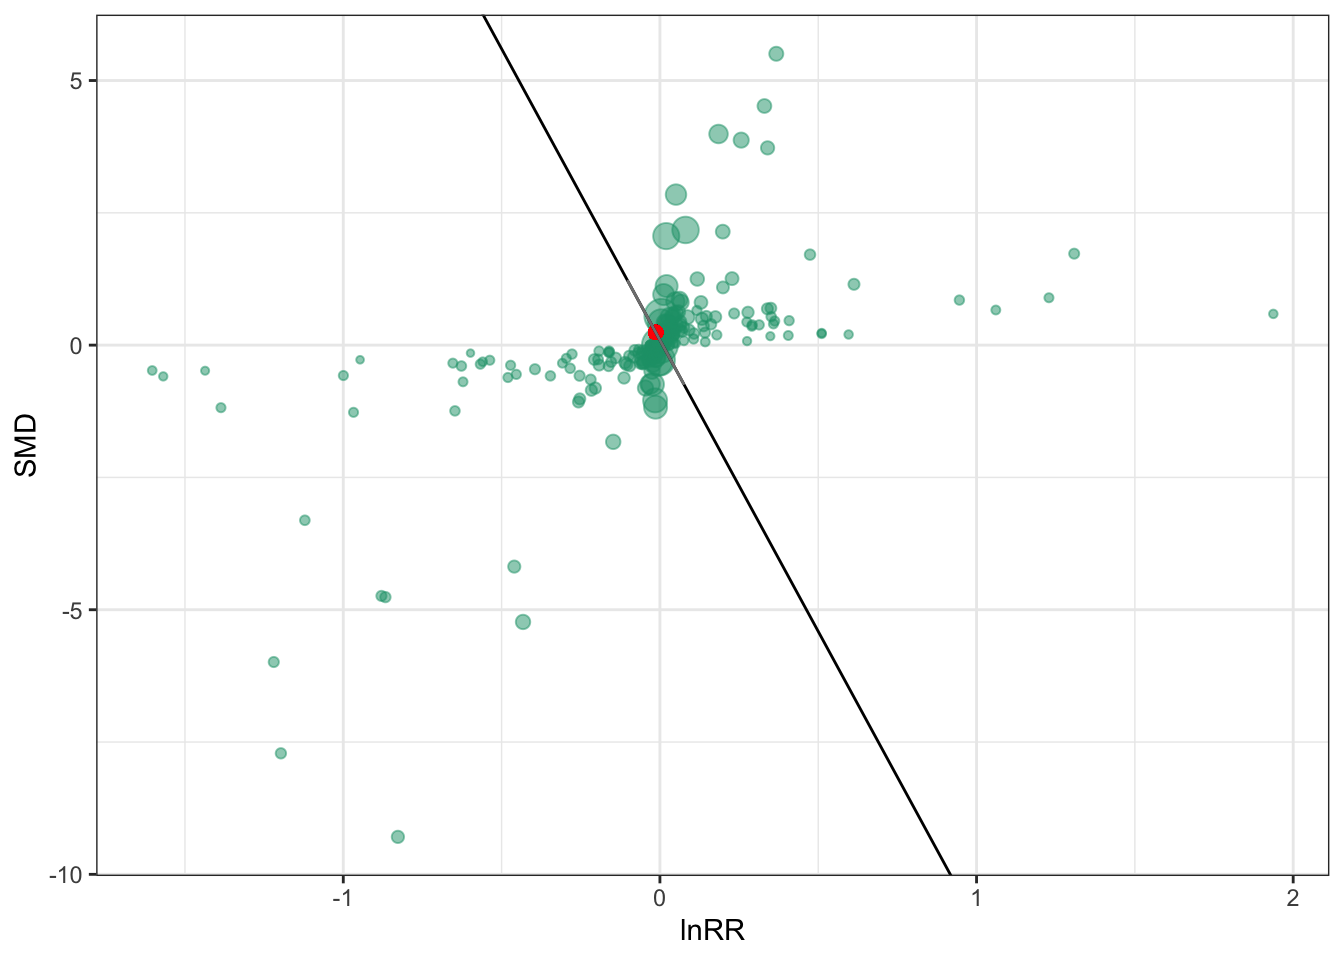

In [ ]:
pacman::p_load(ellipse)
ab.l <- matreg(y=2, x=1, R=Bivariate_model$G, cov=TRUE, means=coef(Bivariate_model), n=Bivariate_model$g.levels.comb.k) # fit regression model

xy <- ellipse(Bivariate_model$G, centre=coef(Bivariate_model), level=0.95) # get 95% coverage region
ellipse_df <- data.frame(x = xy[, 1], y = xy[, 2]) # convert it int dataframe so that we can use ggplot to make a figure

pivot_wider(dataset_bivariate, names_from = ES_measure, values_from = c(ES, V_ES)) %>%
  ggplot() + 
  geom_point(aes(x = ES_lnRR, y = ES_SMDH, size = 1/sqrt(V_ES_lnRR)), color = "#1B9E77", alpha = 0.5) + 
  geom_point(aes(x = coef(Bivariate_model)[1], y = coef(Bivariate_model)[2]), color = "red", size = 2) + 
  geom_abline(intercept = ab.l$tab$beta[1], slope = ab.l$tab$beta[2]) +
  geom_path(data = ellipse_df, aes(x = x, y = y), color = "gray50") +
  #scale_x_continuous(limits = c(-2.5, 2.5)) + 
  #scale_y_continuous(limits = c(-2.5, 2.5)) + 
  guides(size = "none") + 
  labs(x = "lnRR", y = "SMD") + 
  theme_bw()


There is a very high negative correlation between the two effect sizes. This probably is an artifact of the data and not a true correlation. If you look at the model summary, the $tau^2$ for lnRR, it is extremely small 0.0008, i.e., there is very little variance. This could also be stemming from the fact that the log values in the dataset could be causing this. For SMDH on the other hand, the $tau^2$ is 0.1681 that is much larger. This difference in the variance estimate itself could be causing this artifact of the model. I will only go ahead to present this model as a senstivity analysis because I am not completely convinced by it’s robustness.

# Sensitivity Analysis

### Sensitivity Analysis with flagged proxies

In [ ]:
# Preparing new variance-covariance matrix

VCV_lnRR_flagged <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_con_flagged,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_flagged<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_flagged, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_con_flagged)


# saving the model
saveRDS(SA_lnRR_flagged, file = here::here("sensitivity_analysis/SA_lnRR_flagged.rds"))

# What is the effect now?

summary(SA_lnRR_flagged)



Multivariate Meta-Analysis Model (k = 264; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-20.7461   41.4922   53.4922   74.9252   53.8204   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0001     28     no        paper_ID 
sigma^2.2  0.0213  0.1458    264     no  Observation_ID 
sigma^2.3  0.0000  0.0003     52     no  group_ID_coded 
sigma^2.4  0.0000  0.0001     20     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 263) = 2402.2982, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0221  0.0143  1.5404  263  0.1247  -0.0061  0.0503    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0221 0.0143 -0.0061 0.0503 -0.2664 0.3105 


Multivariate Meta-Analysis Model (k = 279; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-348.4133   696.8266   708.8266   730.5924   709.1366   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0052     28     no        paper_ID 
sigma^2.2  0.2428  0.4927    279     no  Observation_ID 
sigma^2.3  0.0074  0.0862     53     no  group_ID_coded 
sigma^2.4  0.0000  0.0056     20     no   population_ID 
sigma^2.5  0.0000  0.0032      7     no    bird_species 

Test for Heterogeneity:
Q(df = 278) = 1194.9344, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1877  0.0650  2.8849  278  0.0042  0.0596  0.3157  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1877 0.0650 0.0596 0.3157 -0.8055 1.1808 

### Sensitivity Analysis without 0 ES

In [ ]:
# Preparing new variance-covariance matrix

VCV_lnRR_no_missingES <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_sin_missingES,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_no_missingES<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_no_missingES, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_sin_missingES)


# saving the model
saveRDS(SA_lnRR_no_missingES, file = here::here("sensitivity_analysis/SA_lnRR_no_missingES.rds"))

# What is the effect now?

summary(SA_lnRR_no_missingES)



Multivariate Meta-Analysis Model (k = 227; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-25.4123   50.8246   62.8246   83.3478   63.2082   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0000     26     no        paper_ID 
sigma^2.2  0.0230  0.1518    227     no  Observation_ID 
sigma^2.3  0.0000  0.0003     46     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     19     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 226) = 2282.3305, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0176  0.0153  1.1527  226  0.2503  -0.0125  0.0478    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0176 0.0153 -0.0125 0.0478 -0.2830 0.3182 


Multivariate Meta-Analysis Model (k = 242; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-319.9149   639.8297   651.8297   672.7385   652.1887   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0012     26     no        paper_ID 
sigma^2.2  0.2917  0.5401    242     no  Observation_ID 
sigma^2.3  0.0000  0.0019     47     no  group_ID_coded 
sigma^2.4  0.0000  0.0045     19     no   population_ID 
sigma^2.5  0.0000  0.0002      7     no    bird_species 

Test for Heterogeneity:
Q(df = 241) = 1123.5497, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub    
  0.1781  0.0696  2.5576  241  0.0112  0.0409  0.3152  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1781 0.0696 0.0409 0.3152 -0.8946 1.2508 

### Sensitivity Analysis with flagged proxies and no missing ES

In [ ]:
# Preparing new variance-covariance matrix

VCV_flagged_no_missingES <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = lnRR_flagged_no_missingES,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_lnRR_flagged_no_missingES<- rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_flagged_no_missingES, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = lnRR_flagged_no_missingES)


# saving the model
saveRDS(SA_lnRR_flagged_no_missingES, file = here::here("sensitivity_analysis/SA_lnRR_flagged_no_missingES.rds"))

# What is the effect now?

summary(SA_lnRR_flagged_no_missingES)



Multivariate Meta-Analysis Model (k = 248; method: REML)

  logLik  Deviance       AIC       BIC      AICc   
-24.5958   49.1917   61.1917   82.2480   61.5417   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0001     28     no        paper_ID 
sigma^2.2  0.0224  0.1497    248     no  Observation_ID 
sigma^2.3  0.0000  0.0003     52     no  group_ID_coded 
sigma^2.4  0.0000  0.0000     20     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 247) = 2399.8889, p-val < .0001

Model Results:

estimate      se    tval   df    pval    ci.lb   ci.ub    
  0.0222  0.0147  1.5164  247  0.1307  -0.0066  0.0511    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se   ci.lb  ci.ub   pi.lb  pi.ub 
 0.0222 0.0147 -0.0066 0.0511 -0.2740 0.3185 


Multivariate Meta-Analysis Model (k = 263; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-339.6297   679.2593   691.2593   712.6694   691.5887   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0002     28     no        paper_ID 
sigma^2.2  0.2772  0.5265    263     no  Observation_ID 
sigma^2.3  0.0001  0.0085     53     no  group_ID_coded 
sigma^2.4  0.0000  0.0002     20     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 262) = 1193.7544, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub     
  0.1914  0.0657  2.9124  262  0.0039  0.0620  0.3208  ** 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1914 0.0657 0.0620 0.3208 -0.8535 1.2363 

### Sensitivity analysis only using effect sizes calculated from means, SDs, and ns

(i.e., excluding any effect sizes calculated from inferential statistics)

In [ ]:
# Preparing new variance-covariance matrix

VCV_SMDH_no_inferential <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = SMDH_no_inferential,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )


## Running intercept only model

SA_SMDH_no_inferential<- rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_no_inferential, # specify lnRR's sampling variance-covariance matrix;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                    control = list(optimizer="optim"),
                    test = "t",
                    data = SMDH_no_inferential)


# saving the model
saveRDS(SA_SMDH_no_inferential, file = here::here("sensitivity_analysis/SA_SMDH_no_inferential.rds"))


# What is the effect now?

summary(SA_SMDH_no_inferential)



Multivariate Meta-Analysis Model (k = 250; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-322.7054   645.4108   657.4108   678.5155   657.7579   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0048     26     no        paper_ID 
sigma^2.2  0.2623  0.5122    250     no  Observation_ID 
sigma^2.3  0.0001  0.0088     46     no  group_ID_coded 
sigma^2.4  0.0004  0.0204     19     no   population_ID 
sigma^2.5  0.0000  0.0013      7     no    bird_species 

Test for Heterogeneity:
Q(df = 249) = 1110.1810, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub    
  0.1721  0.0680  2.5298  249  0.0120  0.0381  0.3061  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


   pred     se  ci.lb  ci.ub   pi.lb  pi.ub 
 0.1721 0.0680 0.0381 0.3061 -0.8465 1.1907 

### Different values of sampling variance correlation

<u>**Robust variance estimation to guard against arbitary value of sampling correlation**</u> - ‘robust()’ function from R package ‘metafor’ (Viechtbauer 2010) using ‘CR2’ (bias reduced linearization correction) from the R package ‘clubSandwich’ (Pustejovsky 2024) for small-sample size adjustment.

At the moment, this is not working..

In [ ]:
#MLMA_lnRR_RVE<- robust(MLMA_lnRR_VCV,
#                        cluster = paper_ID,
#                        clubSandwich = TRUE,
#                        verbose=T)

# # summary(MLMA_lnRR_RVE)
# I2_CI <- i2_ml(MLMA_lnRR_RVE) # Relative heterogeneity
# round(I2_CI,2) # absolute heterogeneity is reported in the summary of the model


> **Important**
>
> Sensitivity Analysis
>
> We will also perform a sensitivity analysis using 0.3 and 0.7 correlation between the sampling variances from the same paper_ID and report it in the supplementary materials. If this sensitivity analysis shows large differences in conclusions for the intercept-only model, we will proceed to perform such sensitivity analysis for the meta-regressions.

First, set a series of ρs (i.e., 0.3, 0.5, 0.7) (we assume these values arbitrarily):

In [ ]:
# rho_range <- c(0.3, 0.5, 0.7)
# 
# MLMAlnRR_VCV_range <- list() # repeatedly run the specified model with varying rho
# for (i in 1:length(rho_range))
# {VCV_range <- vcalc(vi = lnRR_variance,
#                   cluster = paper_ID,
#                   subgroup = group_ID,
#                   obs = Observation_ID,
#                   data = dataset_lnRR,
#                    rho = rho_range[i],
#                     ) # impute sampling variance covariance matrix with varying rho
# 
# MLMAlnRR_VCV_range[[i]] <- rma.mv(yi = lnRR_sign,
#                                   V = VCV_range, # sampling variance covariance matrix with varying values of rho.
#                                  random = list(~ 1 | paper_ID,
#                                   ~ 1 | Observation_ID,
#                                   ~ 1 | experiment_ID,
#                                   ~ 1 | group_ID,
#                                   ~ 1 | repeated_trait_ID),
#                                   method = "REML",
#                                   data = dataset_lnRR # run the model with varying rho
# )
# }
# 
# save(VCV_range, file = here::here("GNM/figures/VCV_range.Rdata"))
# save(MLMAlnRR_VCV_range, file = here::here("GNM/figures/MLMAlnRR_VCV_range.Rdata"))


In [ ]:
# t4 <- data.frame(rho  = rho_range,
#                  "overall effect"  = sapply(MLMAlnRR_VCV_range, function(x) coef(x)),
#                  "standard error" = sapply(MLMAlnRR_VCV_range, function(x) x$se),
#                  "p-value" = sapply(MLMAlnRR_VCV_range, function(x) x$pval),
#                  "Lower CI" = sapply(MLMAlnRR_VCV_range, function(x) x$ci.lb),
#                  "Upper CI" = sapply(MLMAlnRR_VCV_range, function(x) x$ci.ub),
#                  "Log-likehood" = sapply(MLMAlnRR_VCV_range, function(x) fitstats(x)[1,1]),
#                  "AIC" = sapply(MLMAlnRR_VCV_range, function(x) fitstats(x)[3,1]),
#                  "BIC" = sapply(MLMAlnRR_VCV_range, function(x) fitstats(x)[4,1]),
#                  "AICc" = sapply(MLMAlnRR_VCV_range, function(x) fitstats(x)[5,1]))
# 
# colnames(t4) <- c("Sampling correlation", "Overall effect (lnRR)", "Standard error", "p-value", "Lower CI", "Upper CI", "Log-likehood", "AIC", "BIC", "AICc")
# 
# t4 %>% dfround(4) %>% DT::datatable()


# Mechanistic Hypothesis

To address our secondary questions “Does the addition of green nest material by birds increase their reproductive success? (Courtship hypothesis)” and “Does the addition of green nest material have protective effects and health benefits for the nestlings? (Parental care hypothesis)”, we will make use of the unimoderator multilevel meta-regressions hypothesis type (levels: CH, PCH, Both) as the moderator.

In [ ]:
lnRR_hypothesis <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ - 1 + Hypothesis,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

saveRDS(lnRR_hypothesis, file = here::here("model/lnRR_hypothesis.rds"))

lnRR_hypothesis_R2 <- r2_ml(lnRR_hypothesis)
round(lnRR_hypothesis_R2 * 100, 1)


   R2_marginal R2_conditional 
           1.7            1.7 

# Exploratory Analysis

For our exploratory analyses (see section Exploratory Analyses), we will run unimoderator multilevel meta-regressions using the following moderators:

#### Type of parasites

(levels: arthropods, micro-organisms)

In [ ]:
# This analysis only includes dataset that has a proxy relating to parasite or pathogen
dataset_lnRR_parasite <- dataset_lnRR%>%
  filter(!is.na(parasite_type))

VCV_lnRR_parasite <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_parasite,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

lnRR_parasite <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_parasite,# specify lnRR's sampling variance;
                    mods = ~ - 1 + parasite_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                   test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_parasite)

saveRDS( lnRR_parasite, file = here::here("model/lnRR_parasite.rds"))

### Similiarly for SMDH as well selecting the dataset with parasite type
# This analysis only includes dataset that has a proxy relating to parasite or pathogen
dataset_SMDH_parasite <- dataset_SMDH%>%
  filter(!is.na(parasite_type))
VCV_SMDH_parasite <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH_parasite,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

SMDH_parasite <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_parasite,# specify lnRR's sampling variance;
                    mods = ~ - 1 + parasite_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                   test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH_parasite)

 
saveRDS(SMDH_parasite, file = here::here("model/SMDH_parasite.rds"))


#### Time of addition of green nest material

(levels: before egg hatching, after egg hatching, continuously throughout the nesting phase).

In [ ]:
## We use the complete dataset in this case
lnRR_time_gnm_addition <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance using the variance-covariance matrix we created for the intercept-only model since the whole dataset is being used in this case as well
                    mods = ~ - 1 + time_of_gnm_addition,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

saveRDS(lnRR_time_gnm_addition, file = here::here("model/lnRR_time_gnm_addition.rds"))

## Now similarly for the SMDH effect size using the complete dataset
SMDH_time_gnm_addition <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH,# specify lnRR's sampling variance using the variance-covariance matrix we created for the intercept-only model since the whole dataset is being used in this case as well
                    mods = ~ - 1 + time_of_gnm_addition,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

saveRDS(SMDH_time_gnm_addition, file = here::here("model/SMDH_time_gnm_addition.rds"))


#### Type of experimental design

(levels: 1 = non-aromatic vs. aromatic, 2 = no added material vs. aromatic, 3 = no added material vs. non-aromatic).

In [ ]:
# This analysis only includes dataset that has a proxy relating to comaparision type
dataset_lnRR_design <- dataset_lnRR %>%
  filter(!is.na(comparision_type))%>%
  mutate(comparision_type= as.factor(comparision_type))

VCV_lnRR_design <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_design,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )
lnRR_design <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_design ,# specify lnRR's sampling variance;
                    mods = ~ - 1 + comparision_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_design )

saveRDS(lnRR_design, file = here::here("model/lnRR_design.rds"))

# This analysis only includes dataset that has a proxy relating to comaparision type
dataset_SMDH_design <- dataset_SMDH %>%
  filter(!is.na(comparision_type))%>%
  mutate(comparision_type= as.factor(comparision_type))

VCV_SMDH_design <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH_design,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )
SMDH_design <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_design ,# specify lnRR's sampling variance;
                    mods = ~ - 1 + comparision_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH_design )

saveRDS(SMDH_design, file = here::here("model/SMDH_design.rds"))


Let me try to do a sensitivity analysis to see what happens when I remove the control condition of 3 in the overall model since that is expected to not have an effect according to the authors as well.. i.e. it is a double control..

In [ ]:
dataset_lnRR_remove3<-dataset_lnRR%>%filter(is.na(comparision_type) | comparision_type!="3")

VCV_lnRR_remove3 <- vcalc(vi = lnRR_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_lnRR_remove3,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

lnRR_remove3 <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR_remove3 ,# specify lnRR's sampling variance;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR_remove3 )

## Now for SMDH

dataset_SMDH_remove3<-dataset_SMDH%>%filter(is.na(comparision_type) | comparision_type!="3")

VCV_SMDH_remove3 <- vcalc(vi = SMDH_variance,
                  cluster = paper_ID,
                  obs = Observation_ID,
                  data = dataset_SMDH_remove3,
                  rho = 0.5 # assuming that the effect sizes within the same study are correlated with rho = 0.5
                  )

SMDH_remove3 <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH_remove3 ,# specify lnRR's sampling variance;
                    mods = ~ 1,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH_remove3 )

summary(SMDH_remove3)



Multivariate Meta-Analysis Model (k = 246; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-287.7625   575.5250   587.5250   608.5326   587.8779   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0002     26     no        paper_ID 
sigma^2.2  0.2338  0.4836    246     no  Observation_ID 
sigma^2.3  0.0000  0.0008     47     no  group_ID_coded 
sigma^2.4  0.0000  0.0002     19     no   population_ID 
sigma^2.5  0.0000  0.0000      7     no    bird_species 

Test for Heterogeneity:
Q(df = 245) = 1048.0795, p-val < .0001

Model Results:

estimate      se    tval   df    pval   ci.lb   ci.ub    
  0.1415  0.0654  2.1618  245  0.0316  0.0126  0.2703  * 

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Results remain practically the same irrespective..

#### Bird species

(levels: Cyanistes caeruleus, Sturnus unicolor, Tachycineta bicolor, Sturnus vulgaris; note that these levels reflect the list of species studied in our current database, which may increase after updating our search and/or receiving unpublished data from authors)

In [ ]:
lnRR_birds <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ - 1 + bird_species,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

saveRDS(lnRR_birds, file = here::here("model/lnRR_birds.rds"))

## Now doing this for SMDH

SMDH_birds <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH,# specify lnRR's sampling variance;
                    mods = ~ - 1 + bird_species,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

saveRDS(SMDH_birds, file = here::here("model/SMDH_birds.rds"))


#### Type of trait studied

(levels:physiology, morphology, reproduction, behaviour, parasite and pathogenic load, phenology)

In [ ]:
lnRR_trait <-
  metafor::rma.mv(yi = lnRR_sign, # specify lnRR as the effect size measure;
                    V = VCV_lnRR,# specify lnRR's sampling variance;
                    mods = ~ - 1 + trait_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_lnRR)

saveRDS(lnRR_trait, file = here::here("model/lnRR_trait.rds"))

## Now similarly for SMDH

SMDH_trait <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = VCV_SMDH,# specify lnRR's sampling variance;
                    mods = ~ - 1 + trait_type,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

saveRDS(SMDH_trait, file = here::here("model/SMDH_trait.rds"))


# **Sensitivity analyses / robustness checks**

We will run several sensitivity analyses using the same random effect structure as described above aimed at ensuring the robustness of our results. 

1.  We will re-run our intercept-only multivariate meta-analysis (with both lnRR and SMDH as effect sizes) using 0.3 and 0.7 correlation (ρs) between sampling variances from the same paper_ID. If we find large differences in conclusions depending on ρs, we will run the corresponding sensitivity analyses for all our meta-regressions as well.

2.  If during our analyses we notice the need to run additional sensitivity analyses to ensure the robustness of our results, we will label those analyses as non-pre-registered and report them in the supplementary materials of the eventual manuscript.

### Risk of Bias

6\. Blinding: (Levels: yes, no(

7\. Random Assignment: (Levels: yes, no)

8\. Missing Data: (Levels: yes, no)

Note that the specific subset of data for each meta-regression may differ based on the data availability (e.g., information about the type of parasites is only available for effect sizes based on parasite/pathogen related fitness proxy). We will conduct meta-regression on suitable subsets of data for each analysis, provided we have sufficient effect sizes per moderator level (i.e., at least 5 effect sizes per moderator level).

> **Phylogenetic Effects**
>
> Note also that if we obtain additional effect sizes for other bird species after we update our search and/or contact authors, our models may need to account for phylogenetic nonindependence via the inclusion of two additional random effects: “species” and “phylogeny” following Cinar et al. (2022).

## Other Analysis

### Risk of Bias Assessment

-   RoB - The outcome will be presented in the form of a <u>**summary table**</u>. We will conduct uni-moderator meta-regressions using these variables.

## Heterogeneity

To understand the sources of variation or heterogeneity,

### For the intercept-only models

we will use the pluralistic approach recently suggested by Yang et al. (2023),

which consists of calculating four metrics of heterogeneity (σ2, I2, CV, M) to comprehensively understand both total and random-effect specific heterogeneity.

### For the meta-regressions,

we will calculate Rmarginal2 to quantify the heterogeneity explained by the moderator(s) in proportion to the total variation (Nakagawa & Schielzeth, 2013).

## Publication Bias

To explore evidence of publication bias, we will run multilevel meta-regressions with the same random effects structure as described above. We will follow the approach recommended in section 4.3 from Nakagawa et al. (2022) for both lnRR and SMDH, which consists of the following steps:

First, run a uni-moderator meta-regression to test for evidence of small-study effects for both lnRR and SMDH separately, where the moderator is the square root of the inverse of the ‘effective sample size’ (see equation 27 in Nakagawa et al. 2022). The slope of this meta-regression provides information about whether funnel plot asymmetry exists, and the intercept corresponds to the overall effect size adjusted by small-study effects. However, if this intercept is statistically significantly different from zero,


Multivariate Meta-Analysis Model (k = 258; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-295.9602   591.9205   605.9205   630.7367   606.3721   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0000  0.0000     26     no        paper_ID 
sigma^2.2  0.1283  0.3582    258     no  Observation_ID 
sigma^2.3  0.0000  0.0006     47     no  group_ID_coded 
sigma^2.4  0.0228  0.1510     19     no   population_ID 
sigma^2.5  0.0000  0.0030      7     no    bird_species 

Test for Residual Heterogeneity:
QE(df = 256) = 642.1391, p-val < .0001

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 256) = 0.2720, p-val = 0.6025

Model Results:

                      estimate      se     tval   df    pval    ci.lb   ci.ub 
intrcpt                 0.1450  0.1134   1.2782  256  0.2024  -0.0784  0.3684 
sqrt_effective_n_inv   -0.2598  0.4981  -0.5215  256  0.6025  -1.2407  0.7212 
                        
intrcpt                 
s

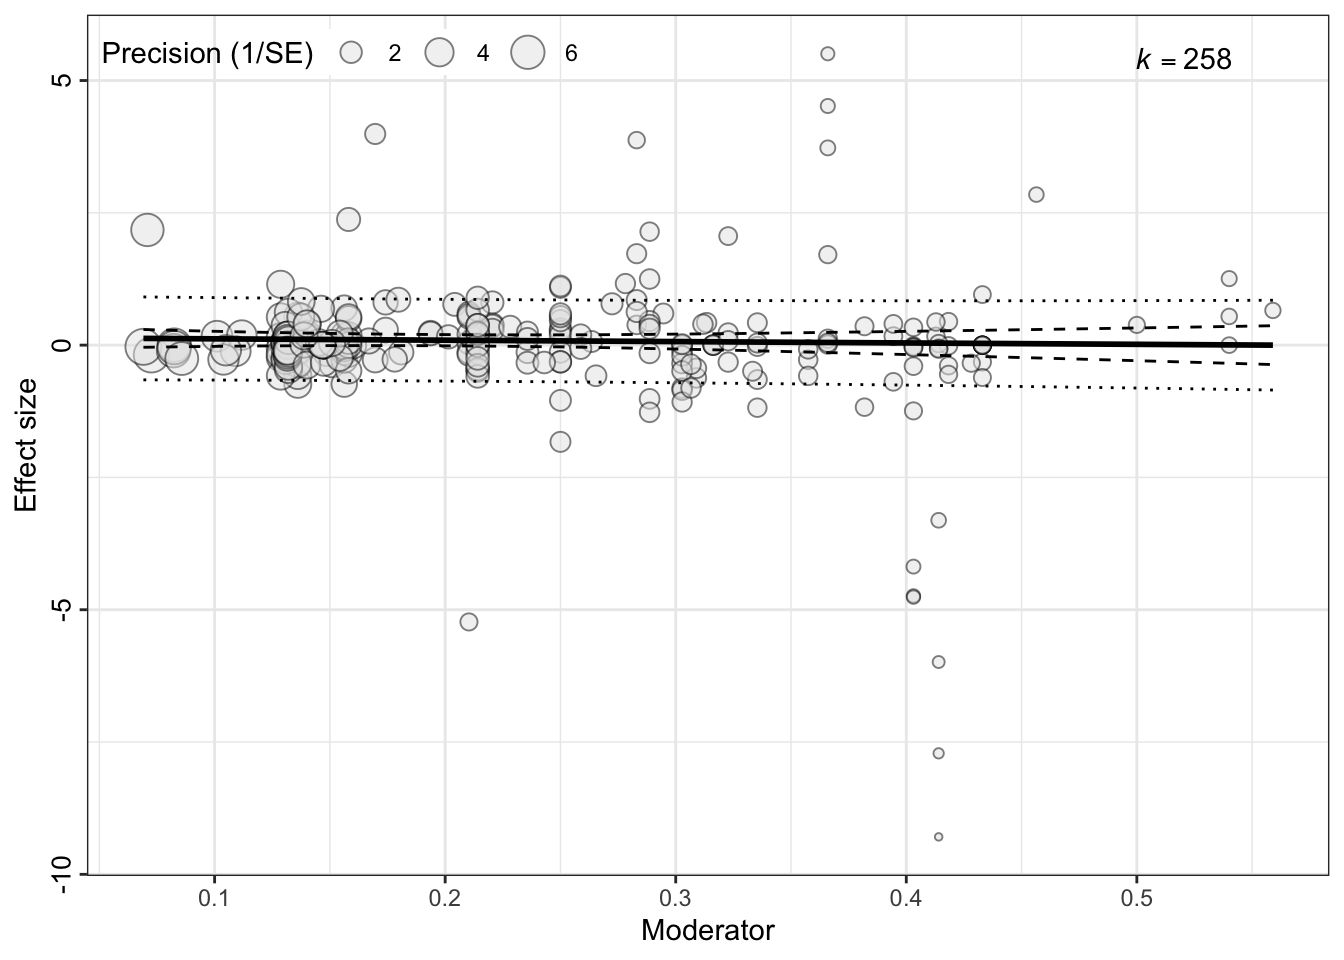

   R2_marginal R2_conditional 
          0.54          15.55 

In [ ]:
dataset_SMDH<-dataset_SMDH%>%
  mutate(effective_n_inv=1/((4*effective_n_experiment*effective_n_control)/(effective_n_experiment+effective_n_control)))%>%
  mutate(sqrt_effective_n_inv=sqrt(effective_n_inv))

MR_SMDH_small_study <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = SMDH_variance,# specify lnRR's sampling variance;
                    mods = ~sqrt_effective_n_inv,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

summary(MR_SMDH_small_study)


Then, run the following uni-moderator meta-regression for both lnRR and SMDH separately which provides a less biased adjusted overall effect. The moderator here is simply the inverse of the ‘effective sample size’ (see equation 28 in Nakagawa et al. 2022). The slope of this meta-regression provides information about whether funnel plot asymmetry exists and the intercept corresponds to a less biased overall effect size adjusted by small-study effects.

Next, run a uni-moderator meta-regression to test for evidence of decline effects (also known as time-lag bias) which includes year of publication (mean-centered) as the only moderator, and whose slope would provide information about whether the overall effect size has changed (decline) over time (Nakagawa et al. 2022; Sánchez-Tójar et al. 2018).


Multivariate Meta-Analysis Model (k = 240; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-280.4498   560.8996   574.8996   599.2055   575.3866   

Variance Components:

            estim    sqrt  nlvls  fixed          factor 
sigma^2.1  0.0001  0.0097     24     no        paper_ID 
sigma^2.2  0.1340  0.3661    240     no  Observation_ID 
sigma^2.3  0.0002  0.0133     45     no  group_ID_coded 
sigma^2.4  0.0365  0.1909     17     no   population_ID 
sigma^2.5  0.0000  0.0001      6     no    bird_species 

Test for Residual Heterogeneity:
QE(df = 238) = 626.8624, p-val < .0001

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 238) = 0.0574, p-val = 0.8109

Model Results:

                 estimate      se    tval   df    pval    ci.lb   ci.ub    
intrcpt            0.1117  0.0624  1.7896  238  0.0748  -0.0113  0.2346  . 
year_MeanCenter    0.0014  0.0058  0.2395  238  0.8109  -0.0101  0.0129    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

   R2_marginal R2_conditional 
          0.14          21.61 

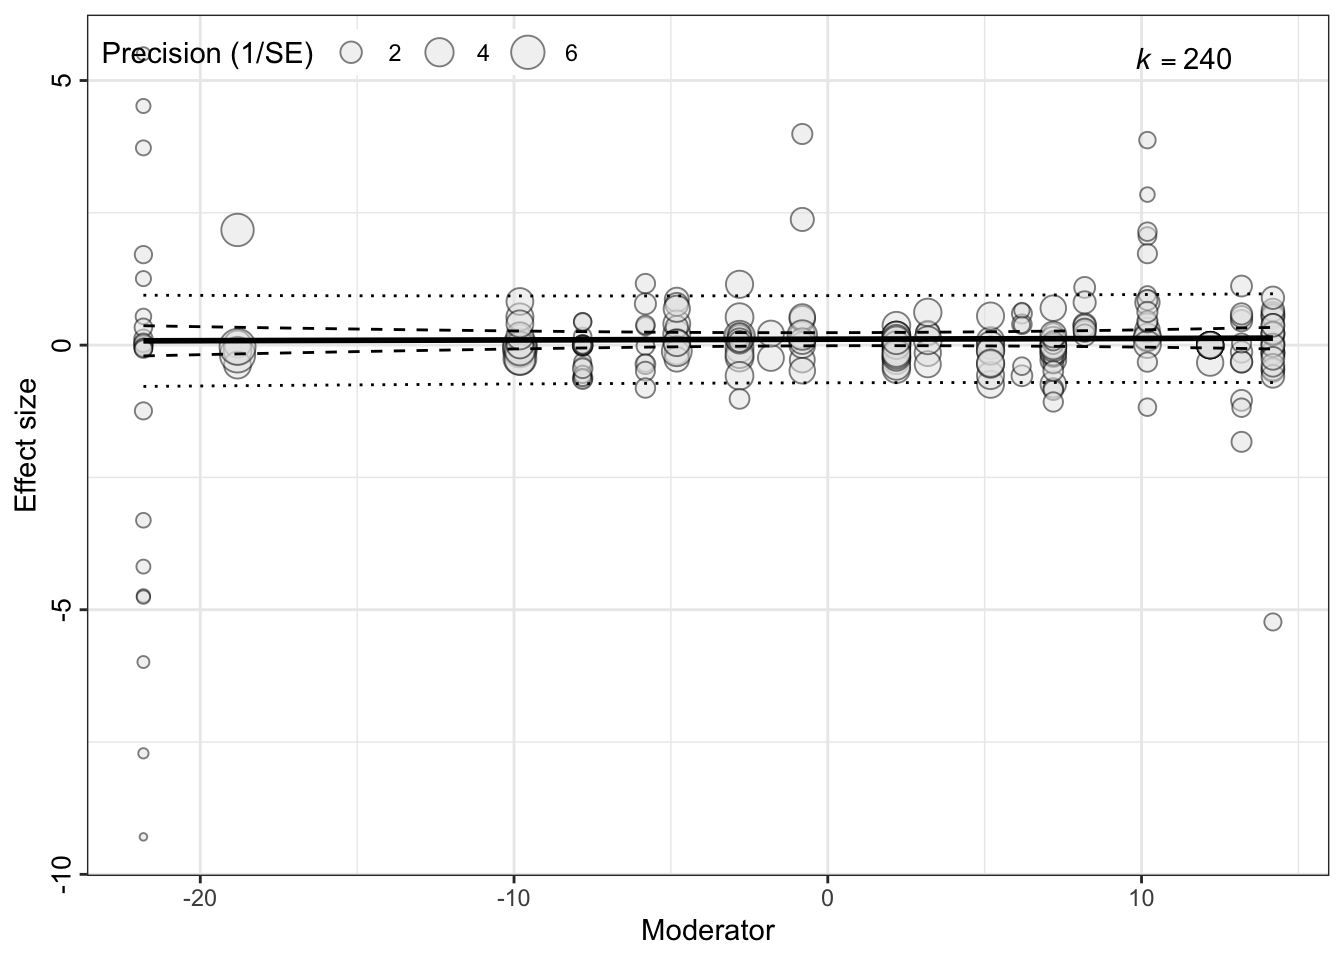

In [ ]:
dataset_SMDH<-dataset_SMDH%>%
  filter(year_publication!="Unpublished")%>%
  mutate(year_MeanCenter=scale(as.numeric(year_publication),scale=F)[,1])

MR_SMDH_decline_eff <-
  metafor::rma.mv(yi = SMDH_sign, # specify lnRR as the effect size measure;
                    V = SMDH_variance,# specify lnRR's sampling variance;
                    mods = ~ year_MeanCenter,
                    random = list(~ 1 | paper_ID,
                                  ~ 1 | Observation_ID,
                                  ~ 1 | group_ID_coded,
                                  ~ 1 | population_ID,
                                  ~ 1 | bird_species),
                    method = "REML",
                  test = "t",
                  control = list(optimizer="optim"),
                  data = dataset_SMDH)

summary(MR_SMDH_decline_eff)


Last, run an all-in meta-regression including both the (square root of the) inverse of the ‘effective sample size’ and the mean-centered year of publication as well as all the other moderators tested in our study to estimate how much heterogeneity is explained by all moderators combined as well as to explore whether evidence remains similar after accounting for all the other moderators (see equation 29 in Nakagawa et al. 2022 for more information about this approach).